In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Loading Dataset

In [ ]:
url = 'https://raw.githubusercontent.com/Palakfs/DAI-Assignment-EDA/refs/heads/main/test_Y3wMUE5_7gLdaTN.csv'
df = pd.read_csv(url)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Inspecting Dataset structure

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


Data Cleaning

In [ ]:
#check for missing values
print(df.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [ ]:
df.nunique()

,0
Loan_ID,367
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,314
CoapplicantIncome,194
LoanAmount,144
Loan_Amount_Term,12


In [ ]:
#Dropping rows where gender and self-employment status is missing
df.dropna(subset=['Gender'], inplace=True)
df.dropna(subset=['Self_Employed'], inplace=True)
print(df.shape[0])

print(df.isnull().sum())

333
Loan_ID               0
Gender                0
Married               0
Dependents            9
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       28
Property_Area         0
dtype: int64


In [ ]:
#Replacing null values of Credit_History , Loan_Amount_Term with median values
df.loc[:, 'Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())
df.loc[:, 'Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           9
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [ ]:
#Replacing LoanAmount null values with mean value
df.loc[:, 'LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           9
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [ ]:
#Removing Dependents and CoapplicantIncome column since it is not needed
df.drop('Dependents', axis=1, inplace=True)
df.drop('CoapplicantIncome', axis=1, inplace=True)
print(df.isnull().sum())

Loan_ID             0
Gender              0
Married             0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
dtype: int64


In [ ]:
#Removing duplicates
df.drop_duplicates(inplace=True)
print(df.shape[0])

333


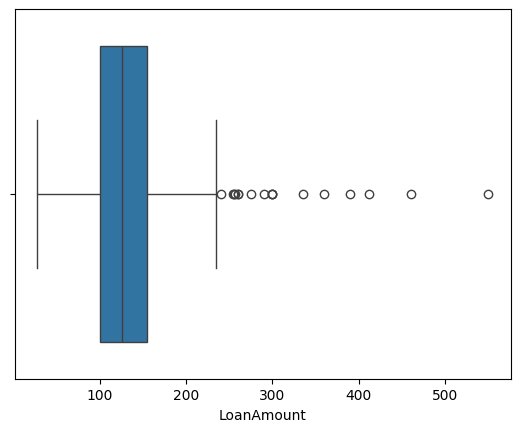

In [ ]:
#Visualizing outliers using boxplot
sns.boxplot(x=df['LoanAmount'])
plt.show()

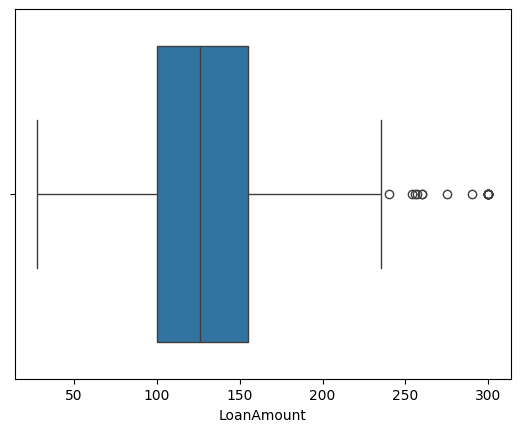

In [ ]:
#We can observe from the plot that the data is right-skewed
#Capping the outlier values upto an upper bound
upper_bound = 300
df.loc[df['LoanAmount'] > upper_bound, 'LoanAmount'] = upper_bound
sns.boxplot(x=df['LoanAmount'])
plt.show()

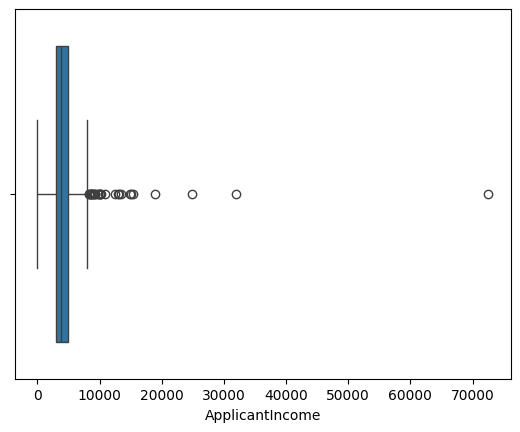

In [ ]:
#Visualizing outliers in Applicant Income using boxplot
sns.boxplot(x=df['ApplicantIncome'])
plt.show()

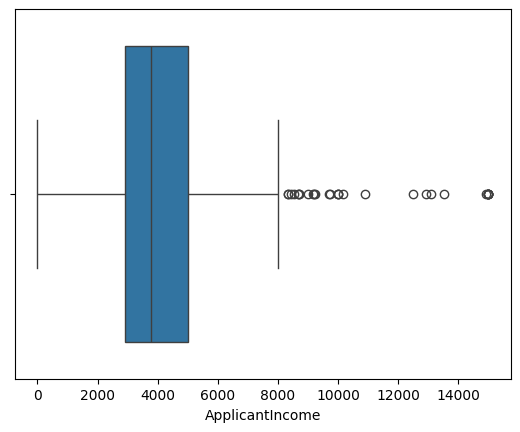

In [ ]:
#We can observe from the plot that the data is right-skewed
#Capping the outlier values of Applicant Income upto an upper bound
upper_bound = 15000
df.loc[df['ApplicantIncome'] > upper_bound, 'ApplicantIncome'] = upper_bound
sns.boxplot(x=df['ApplicantIncome'])
plt.show()

**EDA**

Univariate Analysis

In [ ]:
#Calculating frequency/percentage of gender , education , Credit History and Property Area
gender_counts = df['Gender'].value_counts(normalize=True) * 100
print(gender_counts)

loan_approval_rate = df['Credit_History'].value_counts(normalize=True) * 100
print(loan_approval_rate)

region_distribution = df['Property_Area'].value_counts(normalize=True) * 100
print(region_distribution)

education = df['Education'].value_counts(normalize=True) * 100
print(education)


Gender
Male      79.87988
Female    20.12012
Name: proportion, dtype: float64
Credit_History
1.0    85.585586
0.0    14.414414
Name: proportion, dtype: float64
Property_Area
Urban        38.738739
Semiurban    31.231231
Rural        30.030030
Name: proportion, dtype: float64
Education
Graduate        77.777778
Not Graduate    22.222222
Name: proportion, dtype: float64


We can see from the results that around 80% of total loan applicants were males.85% loans were approved. Applicants are almost equally distributed in urban , semi-urban and rural regions. Around 78% of the applicants were graduate (educated).

In [ ]:
#Summary Statistics
print(df['ApplicantIncome'].describe())
print(df['LoanAmount'].describe())

count      333.000000
mean      4475.921922
std       2621.362172
min          0.000000
25%       2914.000000
50%       3791.000000
75%       5000.000000
max      15000.000000
Name: ApplicantIncome, dtype: float64
count    333.000000
mean     136.027439
std       61.790521
min       28.000000
25%      100.000000
50%      126.000000
75%      155.000000
max      550.000000
Name: LoanAmount, dtype: float64


We can observe from the statistics that Applicants have an average income of 4475 and median income of 3791. The loan amounts have an average of 133 and median of 126 , with max amount being 300.

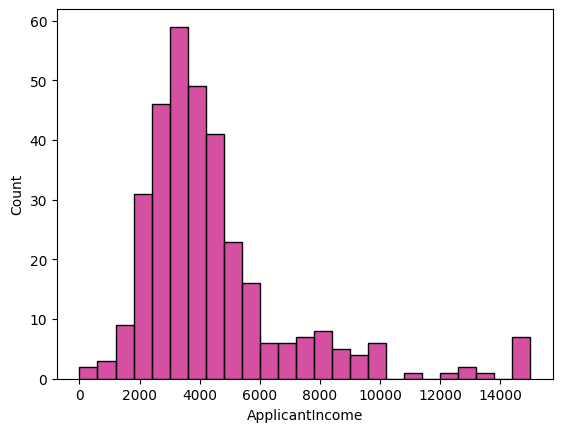

In [ ]:
#Plots to visualize distribution
sns.histplot(df['ApplicantIncome'],color='mediumvioletred')
plt.show()

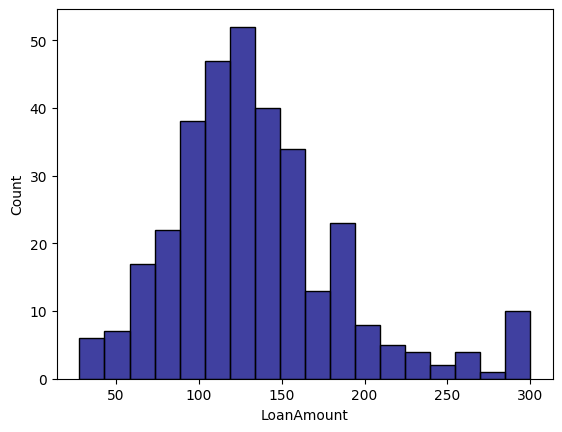

In [ ]:
sns.histplot(df['LoanAmount'],color='navy')
plt.show()

Bivariate Analysis

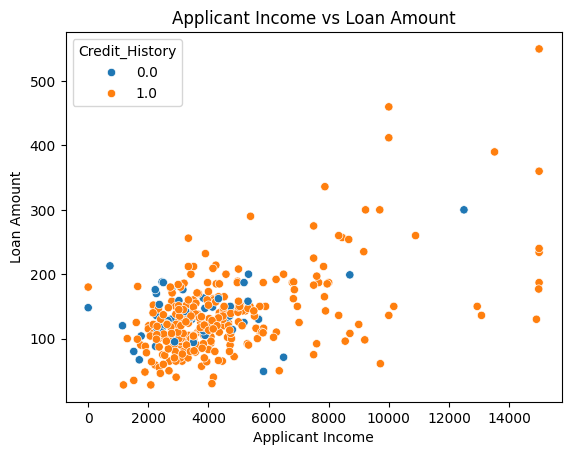

In [ ]:
#Scatter Plot
sns.scatterplot(x=df["ApplicantIncome"], y=df["LoanAmount"], hue=df["Credit_History"])
plt.title("Applicant Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

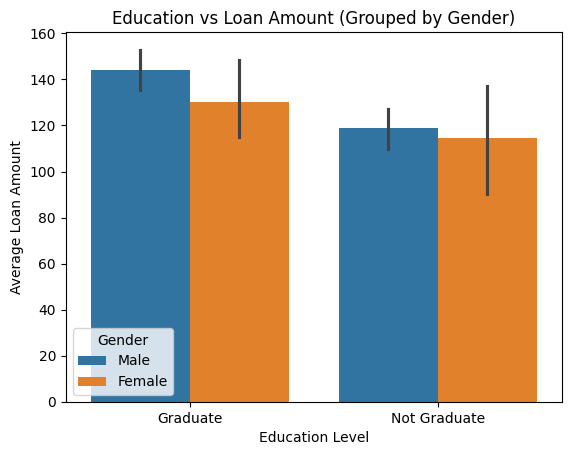

In [ ]:
# Bar Plots
sns.barplot(x=df["Education"], y=df["LoanAmount"], hue=df["Gender"])
plt.title("Education vs Loan Amount (Grouped by Gender)")
plt.xlabel("Education Level")
plt.ylabel("Average Loan Amount")
plt.show()


We can observe from the plot that Graduates take more loans than non-graduates.Moreover, Males take more loans than females.

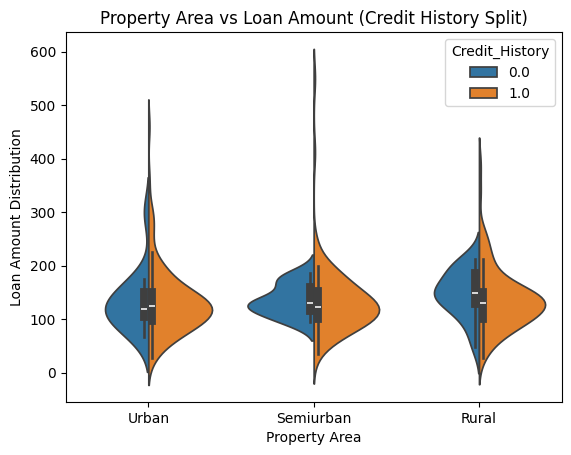

In [ ]:
# Violin Plots
sns.violinplot(x=df["Property_Area"], y=df["LoanAmount"], hue=df["Credit_History"], split=True)
plt.title("Property Area vs Loan Amount (Credit History Split)")
plt.xlabel("Property Area")
plt.ylabel("Loan Amount Distribution")
plt.show()


Multivariate Analysis

                  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
ApplicantIncome          1.000000    0.540000          0.033853   
LoanAmount               0.540000    1.000000          0.123836   
Loan_Amount_Term         0.033853    0.123836          1.000000   
Credit_History           0.136077   -0.017975         -0.050812   

                  Credit_History  
ApplicantIncome         0.136077  
LoanAmount             -0.017975  
Loan_Amount_Term       -0.050812  
Credit_History          1.000000  


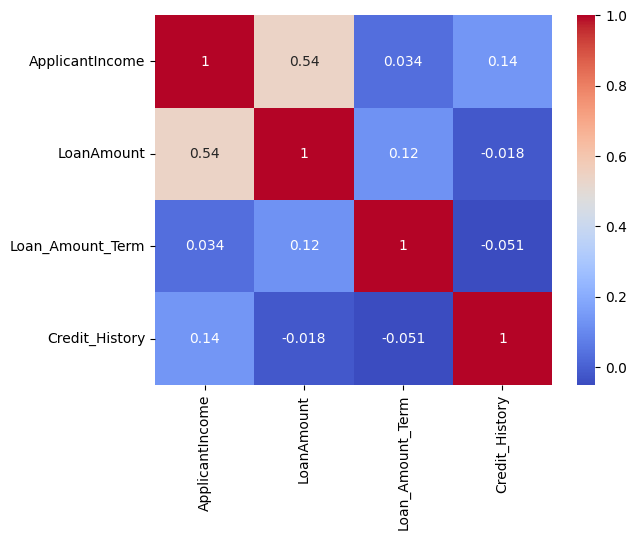

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
print(numerical_df.corr())  # Compute correlation between numerical variables
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")  # Heatmap for visualization
plt.show()

We can see correlation between Applicant Income and Loan Amount , which is expected.However interestingly , there is little correlation between Applicant Income and Credit History which means high income does not guarantee loan success.

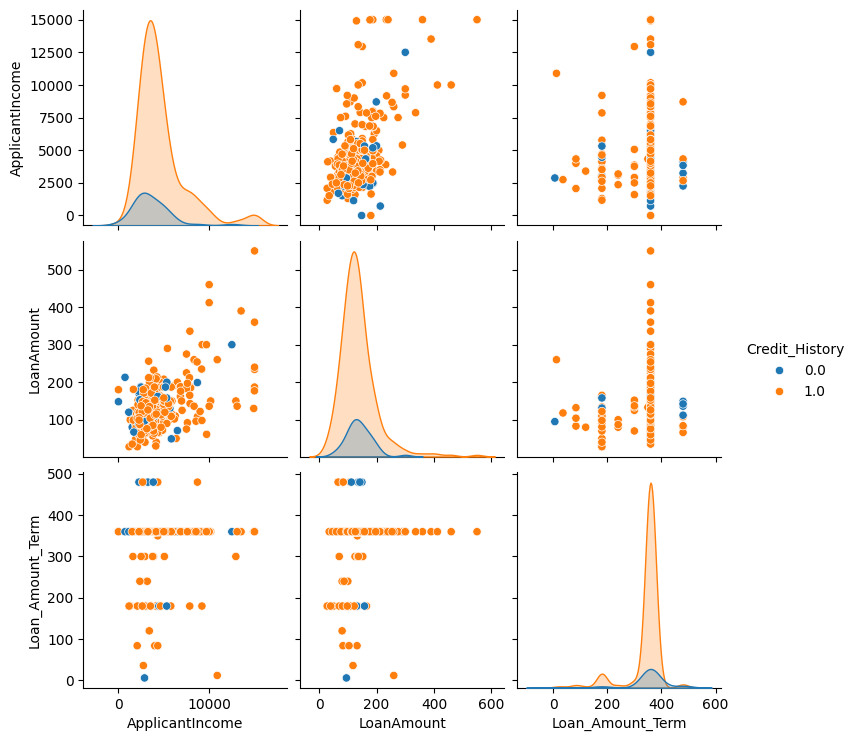

In [ ]:
#Pair Plot
sns.pairplot(df, hue="Credit_History", diag_kind="kde",
             vars=["ApplicantIncome", "LoanAmount", "Loan_Amount_Term"])
plt.show()


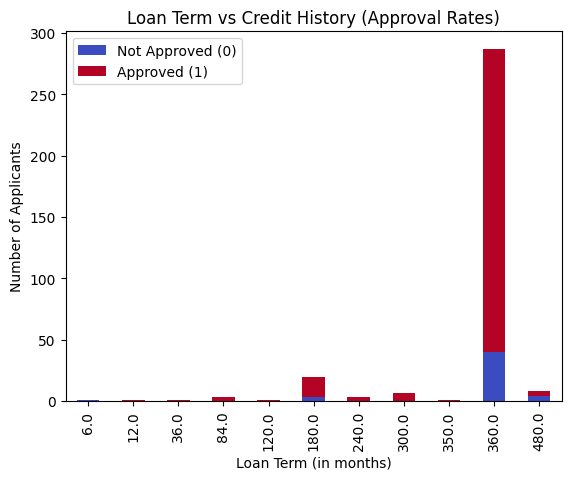

In [ ]:

# Count number of applicants per loan term grouped by credit history
loan_term_success = df.groupby(["Loan_Amount_Term", "Credit_History"]).size().unstack()

# Plot stacked bar chart
loan_term_success.plot(kind="bar", stacked=True, colormap="coolwarm")
plt.title("Loan Term vs Credit History (Approval Rates)")
plt.xlabel("Loan Term (in months)")
plt.ylabel("Number of Applicants")
plt.legend(["Not Approved (0)", "Approved (1)"])
plt.show()


This plot shows that most people apply for loans for a term of 360 days.